**Import Dataset**

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read Data**

In [26]:
df = pd.read_csv("supermarket_sales.csv")

**Sample Data**

In [27]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Get Columns**

In [28]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**Check for Duplicated Values**

In [29]:
df.duplicated().sum()

0

**Check for Missing Values**

In [30]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**Column Information**<br><br>
cogs = unit price * quantity<br>
Tax = 0.05 * cogs<br>
Total = cogs + Tax<br>
gross Income = Total - cogs <br>
gross margin percentage = gross Income / Total<br><br>

**Changing data type of Date and Time Columns**

In [31]:
df['Date'] = pd.to_datetime(df.Date)
df['Time'] = pd.to_datetime(df.Time)

In [32]:
df["day"] = df['Date'].map(lambda x: x.day)
df["month"] = df['Date'].map(lambda x: x.month)
df["year"] = df['Date'].map(lambda x: x.year)

In [33]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2021-06-21 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2021-06-21 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2021-06-21 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2021-06-21 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2021-06-21 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


# Describe Data

In [34]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,8.693563,0.835254,0.0
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0


# Separating Numerical and Categorical Variables

In [35]:
categorical=[x for x in df.columns if df[x].dtype=="O"]
numerical = [x for x in df.columns if x not in categorical]

In [36]:
categorical

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [37]:
numerical

['Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating',
 'day',
 'month',
 'year']

# Remove Outliers

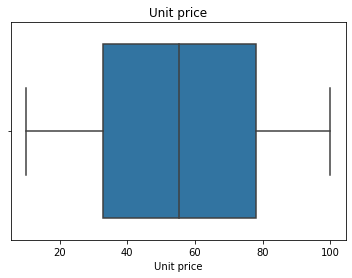

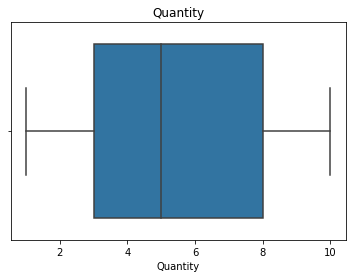

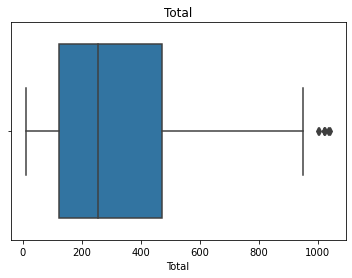

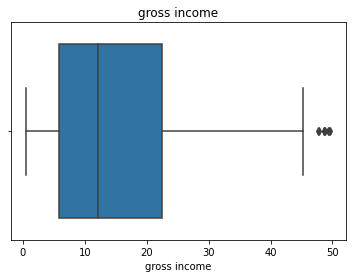

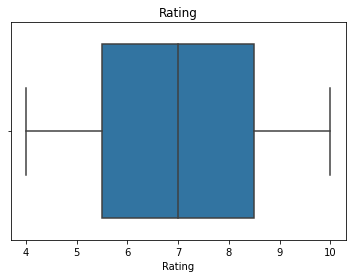

In [39]:
for i in numerical:
  if i in {'Date','Time','day','month','year','Tax 5%','cogs','gross margin percentage'}:
    continue
  plt.title(i)
  sns.boxplot(x = df[i])
  plt.show()

In [40]:
q25, q50 = np.percentile(df['cogs'],25), np.percentile(df['cogs'],75)
iqr = q50 - q25
limit = 1.5*iqr
upper_limit, lower_limit = q50 + limit, q25 - limit
df = df[(df['cogs']>= lower_limit) & (df['cogs']<=upper_limit)]

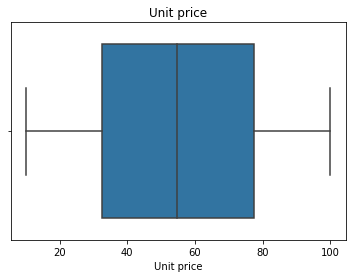

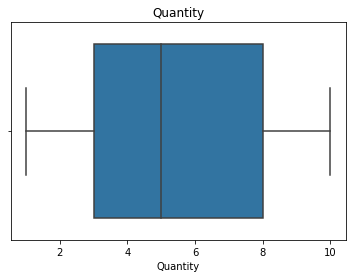

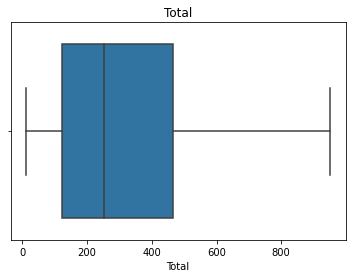

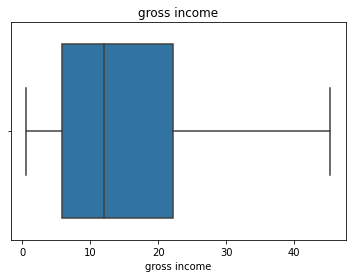

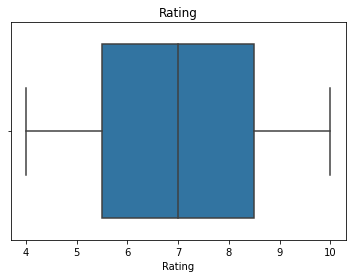

In [41]:
for i in numerical:
  if i in {'Date','Time','day','month','year','Tax 5%','cogs','gross margin percentage'}:
    continue
  plt.title(i)
  sns.boxplot(x = df[i])
  plt.show()

# Compare gross income for each month

In [42]:
df.groupby(['month'],sort = True)['gross income'].agg("sum")

month
1    5295.503
2    4481.749
3    5163.477
Name: gross income, dtype: float64

In [92]:
df.groupby(['month'])['gross income'].count()

month
1    347
2    300
3    344
Name: gross income, dtype: int64

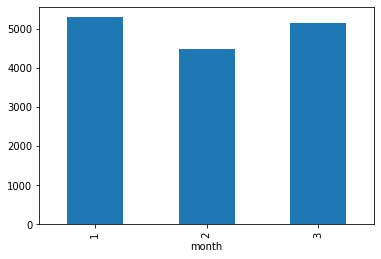

In [43]:
df.groupby(['month'],sort = True)['gross income'].agg("sum").plot(kind = "bar")

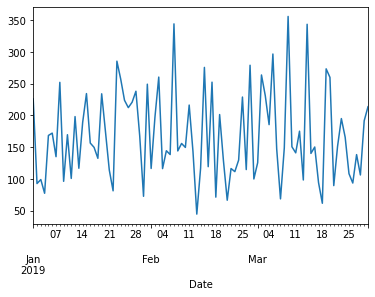

In [67]:
df.groupby(['Date'],sort = True)['gross income'].agg("sum").plot(kind = "line")

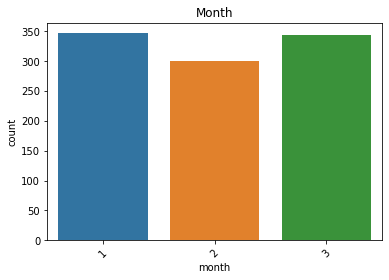

In [93]:
plt.title('Month')
sns.countplot(x = df['month'])
plt.xticks(rotation = 45)
plt.show()

# Compare product's gross income over city, gender and Customer type

**Product's gross income over City**

In [98]:
df.groupby(['Product line','City'])['gross income'].agg('sum').unstack()

City,Mandalay,Naypyitaw,Yangon
Product line,,,
Electronic accessories,811.9735,903.2845,872.2435
Fashion accessories,781.5865,928.4150,728.2485
Food and beverages,724.5185,1082.4950,817.2905
Health and beauty,951.4600,791.2060,599.8930
Home and lifestyle,738.2995,565.1530,1067.4855
Sports and travel,951.8190,702.8480,922.5095


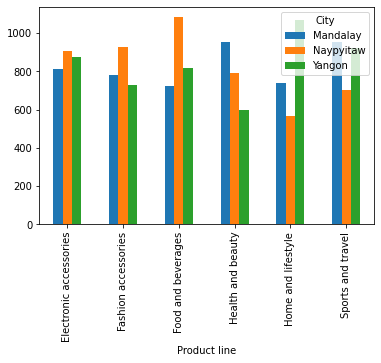

In [94]:
df.groupby(['Product line','City'])['gross income'].agg('sum').unstack().plot(kind = "bar")

In **Naypitaw** city, **Food and beverages** are highly popular.<br>
In **Yangon** city,  **Home and Lifestyle** products are more popular.<br>
In **Mandalay** city, **Health and Beauty** and ** Sports and travel  ** products are equally popular.

**Product's gross income over Gender**

In [106]:
df.groupby(['Product line','Gender'])['gross income'].agg('sum').unstack()

Gender,Female,Male
Product line,,
Electronic accessories,1290.5725,1296.9290
Fashion accessories,1351.1450,1087.1050
Food and beverages,1530.3075,1093.9965
Health and beauty,883.8565,1458.7025
Home and lifestyle,1332.9525,1037.9855
Sports and travel,1312.9810,1264.1955


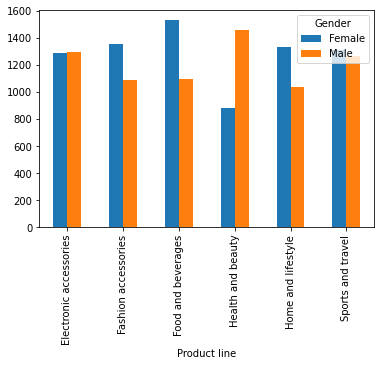

In [103]:
df.groupby(['Product line','Gender'])['gross income'].agg('sum').unstack().plot(kind = "bar")

From the above graph we can see that the **Health and beauty products are more popular in Male than in Female**.<br>Also, **Females purchase more Food and beverages.**

**Product's gross income over Customer type**

In [104]:
df.groupby(['Product line','Customer type'])['gross income'].agg('sum').unstack()

Customer type,Member,Normal
Product line,,
Electronic accessories,1166.5950,1420.9065
Fashion accessories,1155.2670,1282.9830
Food and beverages,1443.9600,1180.3440
Health and beauty,1230.0495,1112.5095
Home and lifestyle,1332.2870,1038.6510
Sports and travel,1344.4905,1232.6860


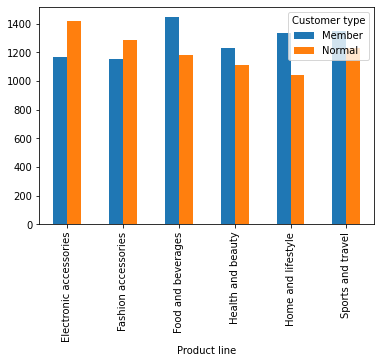

In [105]:
df.groupby(['Product line','Customer type'])['gross income'].agg('sum').unstack().plot(kind = "bar")

Other than Electronic accessories and Fashion accessories, Member customer type provides more gross income in all product lines.<br>Food and beverages is the highest of all.<br>Also we can observe **non member customers has generated more gross income in electronic accessories** than most of the product lines

In [73]:
df.groupby(['Product line'])['gross income'].agg('sum')

Product line
Electronic accessories    2587.5015
Fashion accessories       2438.2500
Food and beverages        2624.3040
Health and beauty         2342.5590
Home and lifestyle        2370.9380
Sports and travel         2577.1765
Name: gross income, dtype: float64

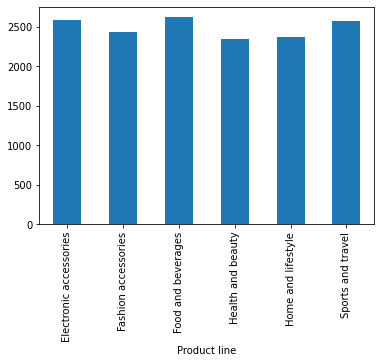

In [88]:
df.groupby(['Product line'])['gross income'].agg('sum').plot(kind = "bar")

Food and beverages generated more gross income.

# Compare Profits of each City

In [108]:
df.groupby(['City'])['gross income'].agg('sum')

City
Mandalay     4959.6570
Naypyitaw    4973.4015
Yangon       5007.6705
Name: gross income, dtype: float64

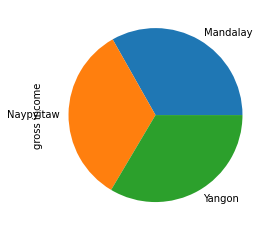

In [91]:
df.groupby(['City'])['gross income'].agg('sum').plot(kind = "pie")

# Compare customers payment preference

In [109]:
df.groupby(['Payment','Gender'])['gross income'].count().unstack()

Gender,Female,Male
Payment,,
Cash,177,165
Credit card,160,147
Ewallet,158,184


In [113]:
df.groupby(['Payment','Gender'])['gross income'].agg('sum').unstack()

Gender,Female,Male
Payment,,
Cash,2786.290,2461.370
Credit card,2400.605,2201.397
Ewallet,2514.920,2576.147


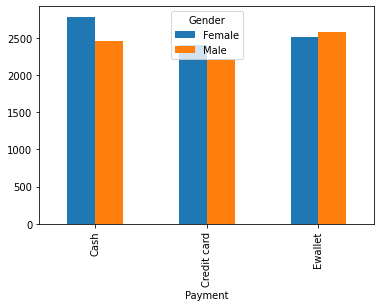

In [112]:
df.groupby(['Payment','Gender'])['gross income'].agg('sum').unstack().plot(kind = "bar")

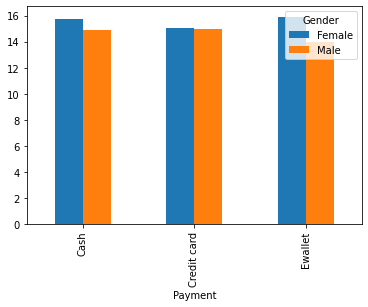

In [115]:
df.groupby(['Payment','Gender'])['gross income'].agg('mean').unstack().plot(kind = "bar")

Though Men make more Ewallet transactions (184 transactions), Women generated more gross income via Cash payment method.<br>But On comparing the average gross income, there is no big difference between Male and Female

# Compare Rating for each product line

In [125]:
df.groupby(['Product line','Customer type','Gender','City'])['Rating'].agg('mean').unstack()

City                                         Mandalay  Naypyitaw    Yangon
Product line           Customer type Gender                               
Electronic accessories Member        Female  7.042857   6.755556  6.416667
                                     Male    7.307692   6.109091  7.552632
                       Normal        Female  7.164286   7.042105  6.225000
                                     Male    6.964286   6.831250  7.276923
Fashion accessories    Member        Female  6.456250   7.958824  6.641667
                                     Male    6.462500   7.215385  6.660000
                       Normal        Female  6.894118   7.237500  7.312500
                                     Male    7.146154   7.258824  6.566667
Food and beverages     Member        Female  7.116667   7.054545  6.880000
                                     Male    6.872727   6.961538  7.105263
                       Normal        Female  7.663636   7.680000  7.092308
                                     Male    6.170000   6.793333  7.793750
Health and beauty      Member        Female  8.014286   7.236364  6.608333
                                     Male    6.868421   6.892857  7.470000
                       Normal        Female  6.900000   7.083333  7.522222
                                     Male    7.142857   6.853333  6.412500
Home and lifestyle     Member        Female  7.283333   6.968421  6.981250
                                     Male    6.044444   7.177778  6.644444
                       Normal        Female  6.075000   7.400000  6.281250
                                     Male    6.636842   7.055556  7.913333
Sports and travel      Member        Female  6.211111   6.680000  7.022222
                                     Male    6.075000   7.330769  7.863636
                       Normal        Female  6.608333   7.030769  7.381818
                                     Male    6.980000   8.066667  7.057895

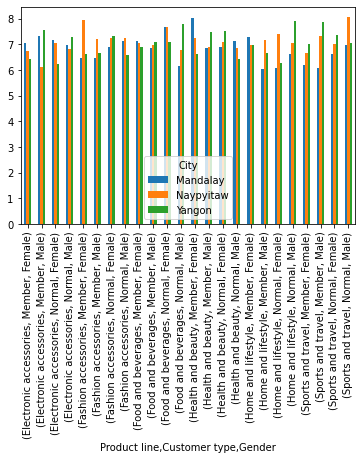

In [124]:
df.groupby(['Product line','Customer type','Gender','City'])['Rating'].agg('mean').unstack().plot(kind = "bar")

We Can observe that the electronic accessories in Naypyitaw needs improvement compared to others